In [23]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import  seaborn as sns

from utility import utilities

In [24]:
df = pd.read_table('Hippo_2.txt')
df.set_index('Fasta headers',inplace=True)
#rename columns
df.columns = ['ND_1','ND_2','ND_3','HF_1','HF_2','HF_3','KO_1','KO_2','KO_3','null']
#print (df.reset_index(drop=True).head())

#remove all zeros rows
print ('before', df.shape)
df = df[(df.T != 0).any()]
print ('after', df.shape)


before (8304, 10)
after (7478, 10)


/Users/mtinti/miniconda2/envs/commonPy3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


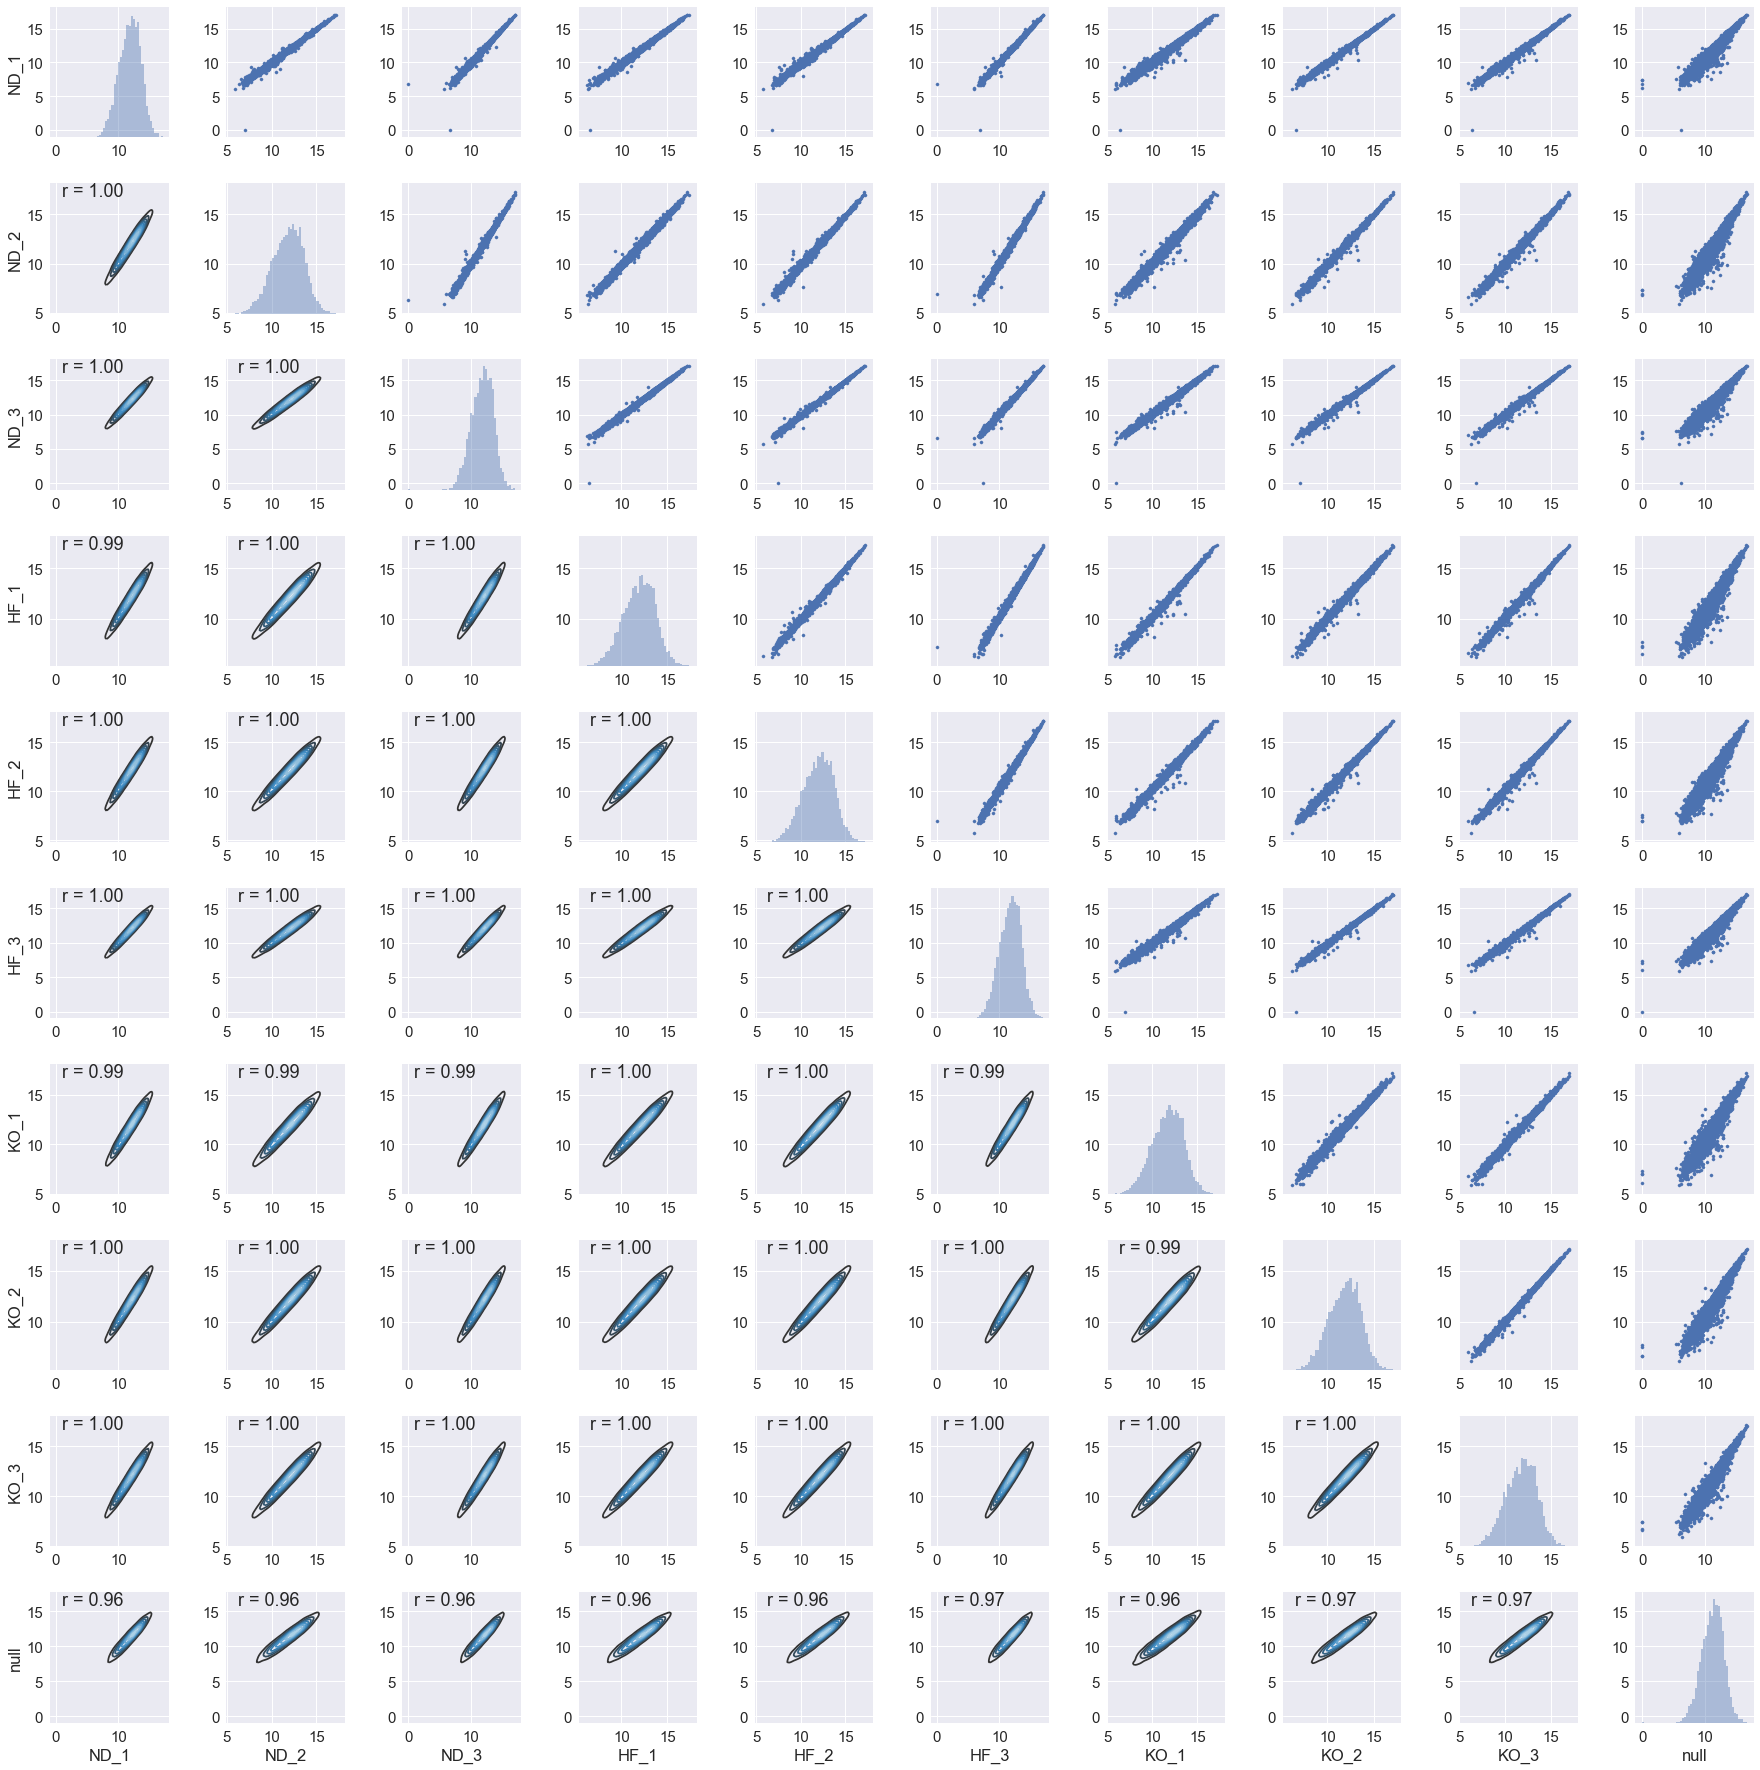

In [3]:
#visualize reproducibility
utilities.make_scatter_matrix(np.log1p(df), 'pre_norm_hippo')


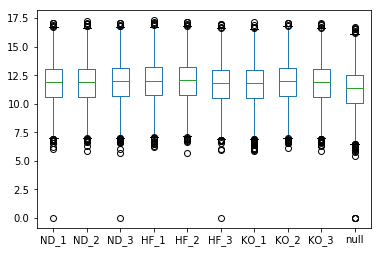

In [5]:
#data distribution before normalization
np.log1p(df).plot(kind='box')
plt.show()

1 0.0582104011203 4.99471883919
2 0.00124949649806 0.152496822387
3 3.57894136834e-05 0.00436790110134
4 1.02274052372e-06 0.000124839488652
5 2.92271864072e-08 3.56768562559e-06
normalized in 5 steps


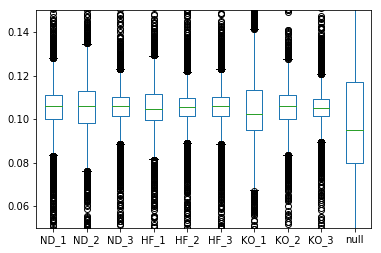

In [3]:
#data distribution after normalization
norm_df = utilities.constandNormalize(df)
np.log1p(norm_df).plot(kind='box')
plt.ylim(0.05,0.15)
plt.show()

[ 0.74173373  0.11451822]


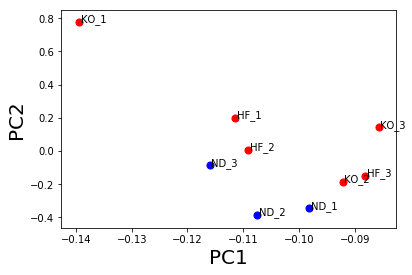

In [4]:
#visualize pca data
utilities.make_pca(norm_df)

In [6]:

#for visualization later
norm_df['mean_ND'] = norm_df[['ND_1','ND_2','ND_3']].median(axis=1)
norm_df['mean_HF'] = norm_df[['HF_1','HF_2','HF_3']].median(axis=1)
norm_df['mean_KO'] = norm_df[['KO_1','KO_2','KO_3']].median(axis=1)

norm_df['log2_fc_HF_ND'] = np.log2(norm_df['mean_HF']/norm_df['mean_ND'])
norm_df['log2_fc_KO_ND'] = np.log2(norm_df['mean_KO']/norm_df['mean_ND'])
norm_df['log10_HF_ND'] = np.log10(norm_df['mean_HF']+norm_df['mean_ND'])
norm_df['log10_KO_ND'] = np.log10(norm_df['mean_KO']+norm_df['mean_ND'])



In [179]:
#visualize dataset
norm_df.reset_index(drop=True).sort_values('log2_fc_HF_ND',ascending=False).head()

,ND_1,ND_2,ND_3,HF_1,HF_2,HF_3,KO_1,KO_2,KO_3,null,mean_ND,mean_HF,mean_KO,log2_fc_HF_ND,log2_fc_KO_ND,log10_HF_ND,log10_KO_ND
6511,0.034882,0.024104,0.038481,0.047667,0.220219,0.252961,0.047606,0.046706,0.042072,0.356414,0.034882,0.220219,0.046706,2.658401,0.421149,-0.593288,-1.088374
7104,0.044067,0.030267,0.029901,0.057079,0.064689,0.043526,0.041539,0.035520,0.116443,0.648081,0.030267,0.057079,0.041539,0.915227,0.456727,-1.058759,-1.143843
7459,0.120074,0.091332,0.000000,0.096217,0.164822,0.178780,0.078716,0.138133,0.133164,0.109873,0.091332,0.164822,0.133164,0.851723,0.544018,-0.591499,-0.648792
6276,0.057692,0.150874,0.076531,0.151403,0.071790,0.137370,0.156270,0.073538,0.176803,0.058842,0.076531,0.137370,0.156270,0.843962,1.029928,-0.669787,-0.633017
7233,0.143258,0.062115,0.059624,0.103412,0.045369,0.137620,0.050074,0.107507,0.076952,0.325181,0.062115,0.103412,0.076952,0.735377,0.309017,-0.781132,-0.856774


In [7]:
#t-test between normal diet and high fat diet 
from scipy.stats import ttest_ind
onesample_results = ttest_ind(norm_df[['ND_1','ND_2','ND_3']].T, norm_df[['HF_1','HF_2','HF_3']].T)
norm_df['T_ND_HF']=onesample_results[0]
norm_df['PVAL_ND_HF']=onesample_results[1]

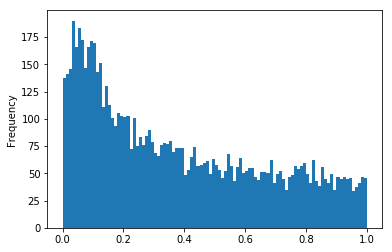

In [8]:
#p-value distributions
norm_df['PVAL_ND_HF'].plot(kind='hist',bins=100)

In [10]:
#correct for multy-hypotesis
from statsmodels.sandbox.stats.multicomp import multipletests
p_adjusted = multipletests(norm_df['PVAL_ND_HF'], method='bonferroni')
#print (p_adjusted)
norm_df['PVAL_ND_HF_ADJ']=p_adjusted[1]
norm_df.reset_index(drop=True).sort_values('PVAL_ND_HF_ADJ').head()

,ND_1,ND_2,ND_3,HF_1,HF_2,HF_3,KO_1,KO_2,KO_3,null,mean_ND,mean_HF,mean_KO,log2_fc_HF_ND,log2_fc_KO_ND,log10_HF_ND,log10_KO_ND,T_ND_HF,PVAL_ND_HF,PVAL_ND_HF_ADJ
1203,0.116584,0.116386,0.116118,0.106387,0.106788,0.107245,0.100319,0.107797,0.106714,0.126774,0.116386,0.106788,0.106714,-0.124171,-0.125164,-0.651356,-0.651499,33.833888,0.000005,0.034041
0,0.108213,0.097846,0.106869,0.122182,0.107421,0.109727,0.133509,0.100438,0.111803,0.113103,0.106869,0.109727,0.111803,0.038074,0.065120,-0.664349,-0.660206,-1.565240,0.192580,1.000000
4991,0.107031,0.124961,0.117700,0.104122,0.116927,0.102450,0.108880,0.114147,0.105587,0.109304,0.117700,0.104122,0.108880,-0.176834,-0.112369,-0.653995,-0.644778,1.259914,0.276197,1.000000
4990,0.121454,0.122553,0.113305,0.115766,0.117891,0.107821,0.107426,0.118235,0.119230,0.067428,0.121454,0.115766,0.118235,-0.069194,-0.038749,-0.624848,-0.620351,1.247576,0.280238,1.000000
4989,0.090813,0.100907,0.108206,0.111267,0.119590,0.116635,0.123955,0.109766,0.126174,0.103797,0.100907,0.116635,0.123955,0.208975,0.296789,-0.662456,-0.648084,-2.831326,0.047281,1.000000


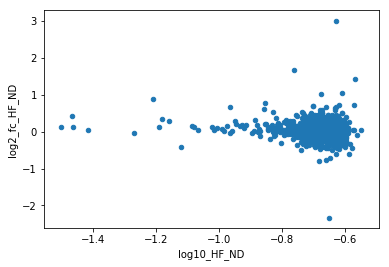

In [11]:
norm_df.plot(kind='scatter',x='log10_HF_ND',y='log2_fc_HF_ND')

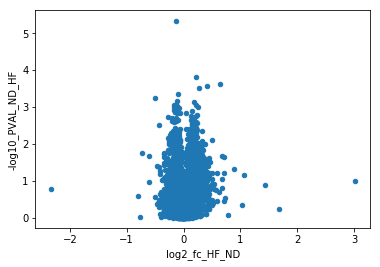

In [12]:
norm_df['-log10_PVAL_ND_HF'] = -np.log10(norm_df['PVAL_ND_HF'])
norm_df.plot(kind='scatter',x='log2_fc_HF_ND',y='-log10_PVAL_ND_HF')

In [13]:
#t-test between normal diet and KO - high fat diet 
from scipy.stats import ttest_ind
onesample_results = ttest_ind(norm_df[['ND_1','ND_2','ND_3']].T, norm_df[['KO_1','KO_2','KO_3']].T)
norm_df['T_ND_KO']=onesample_results[0]
norm_df['PVAL_ND_KO']=onesample_results[1]

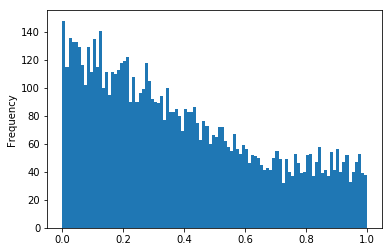

In [14]:
#p-value distributions
norm_df['PVAL_ND_KO'].plot(kind='hist',bins=100)

In [15]:
#correct for multy-hypotesis
from statsmodels.sandbox.stats.multicomp import multipletests
p_adjusted = multipletests(norm_df['PVAL_ND_KO'], method='bonferroni')
#print (p_adjusted)
norm_df['PVAL_ND_KO_ADJ']=p_adjusted[1]
norm_df.reset_index(drop=True).sort_values('PVAL_ND_KO_ADJ').head()

,ND_1,ND_2,ND_3,HF_1,HF_2,HF_3,KO_1,KO_2,KO_3,null,...,log2_fc_KO_ND,log10_HF_ND,log10_KO_ND,T_ND_HF,PVAL_ND_HF,PVAL_ND_HF_ADJ,-log10_PVAL_ND_HF,T_ND_KO,PVAL_ND_KO,PVAL_ND_KO_ADJ
4326,0.039689,0.039744,0.039414,0.042578,0.043624,0.052195,0.244995,0.233963,0.243161,0.131748,...,2.615092,-1.079287,-0.548444,-2.137781,0.099335,1.0,1.002897,-58.891058,4.978740e-07,0.003723
3966,0.102013,0.102633,0.102158,0.114411,0.091427,0.114890,0.116683,0.116600,0.118403,0.131893,...,0.191796,-0.664404,-0.659872,-0.599312,0.581257,1.0,0.235632,-24.254118,1.714366e-05,0.128200
1173,0.126741,0.122561,0.124537,0.130179,0.126602,0.107935,0.099119,0.097178,0.094155,0.082103,...,-0.357878,-0.600086,-0.654204,0.434443,0.686375,1.0,0.163438,14.767342,1.223998e-04,0.915305
4992,0.107929,0.108096,0.102473,0.096300,0.104694,0.106157,0.110630,0.128454,0.135272,0.111107,...,0.251164,-0.672389,-0.626384,1.055357,0.350788,1.0,0.454956,-2.457957,6.984468e-02,1.000000
4991,0.107031,0.124961,0.117700,0.104122,0.116927,0.102450,0.108880,0.114147,0.105587,0.109304,...,-0.112369,-0.653995,-0.644778,1.259914,0.276197,1.0,0.558781,1.217029,2.904856e-01,1.000000


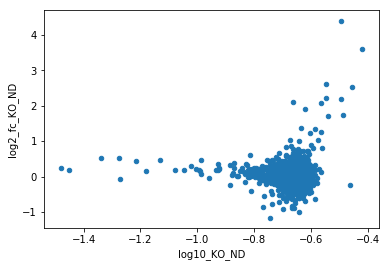

In [17]:
norm_df.plot(kind='scatter',x='log10_KO_ND',y='log2_fc_KO_ND')

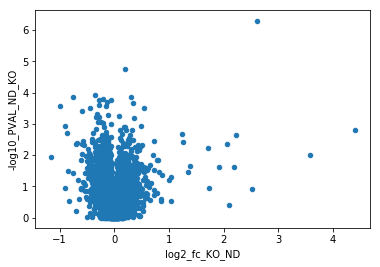

In [18]:
norm_df['-log10_PVAL_ND_KO'] = -np.log10(norm_df['PVAL_ND_KO'])
norm_df.plot(kind='scatter',x='log2_fc_KO_ND',y='-log10_PVAL_ND_KO')

In [21]:
test[['ND_1','ND_2','ND_3','KO_1','KO_2','KO_3','PVAL_ND_KO_ADJ','log2_fc_KO_ND']]

,ND_1,ND_2,ND_3,KO_1,KO_2,KO_3,PVAL_ND_KO_ADJ,log2_fc_KO_ND
Fasta headers,,,,,,,,
sp|Q9Z2H5|E41L1_MOUSE Band 4.1-like protein 1 OS=Mus musculus GN=Epb41l1 PE=1 SV=2;sp|Q9Z2H5-2|E41L1_MOUSE Isoform 2 of Band 4.1-like protein 1 OS=Mus musculus GN=Epb41l1;sp|Q9Z2H5-3|E41L1_MOUSE Isoform 3 of Band 4.1-like protein 1 OS=Mus musculus GN=Epb41,0.039689,0.039744,0.039414,0.244995,0.233963,0.243161,0.003723,2.615092


In [22]:
prot_id='sp|Q9Z2H5|E41L1_MOUSE Band 4.1-like protein 1 OS=Mus musculus GN=Epb41l1 PE=1 SV=2;sp|Q9Z2H5-2|E41L1_MOUSE Isoform 2 of Band 4.1-like protein 1 OS=Mus musculus GN=Epb41l1;sp|Q9Z2H5-3|E41L1_MOUSE Isoform 3 of Band 4.1-like protein 1 OS=Mus musculus GN=Epb41'
df.loc[prot_id][['ND_1','ND_2','ND_3','KO_1','KO_2','KO_3']]

ND_1     90555.0
ND_2     90637.0
ND_3     93408.0
KO_1    494210.0
KO_2    549200.0
KO_3    521460.0
Name: sp|Q9Z2H5|E41L1_MOUSE Band 4.1-like protein 1 OS=Mus musculus GN=Epb41l1 PE=1 SV=2;sp|Q9Z2H5-2|E41L1_MOUSE Isoform 2 of Band 4.1-like protein 1 OS=Mus musculus GN=Epb41l1;sp|Q9Z2H5-3|E41L1_MOUSE Isoform 3 of Band 4.1-like protein 1 OS=Mus musculus GN=Epb41, dtype: float64